<a href="https://colab.research.google.com/github/VikramjitSinghRathee/RDKit-Cheminformatics/blob/master/RDKit_and_Fingerprint_matching_Tanimoto_Similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install RDKit. Takes 2-3 minutes
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c conda-forge rdkit

--2020-05-26 05:08:11--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh [following]
--2020-05-26 05:08:11--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>]  81.12M   181MB/s    in 0.4s    

2020-05-26 05:08:12 (181 MB/s) - ‘Miniconda3-latest-Linux

In [6]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

print("Done")

Done



SMILES Generator: http://www.cheminfo.org/flavor/malaria/Utilities/SMILES_generator___checker/index.html



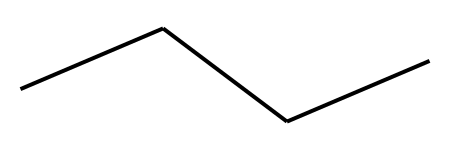

In [7]:
mol = Chem.MolFromSmiles('CCCC')
mol

In [8]:
smiles = Chem.MolToSmiles(mol)
smiles

'CCCC'

In [9]:
mw = Descriptors.MolWt(mol)
mw

58.123999999999995

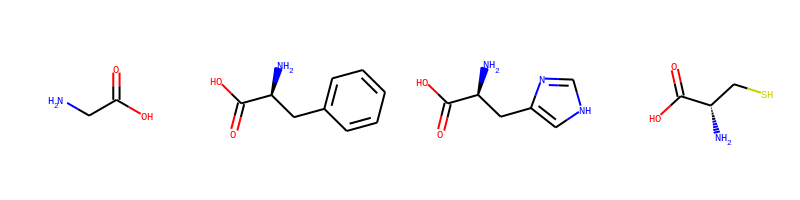

In [10]:
# Drawing molecules from smiles
smiles_list = ['C(C(=O)O)N','N[C@@H](CC1=CC=CC=C1)C(O)=O','O=C([C@H](CC1=CNC=N1)N)O','C([C@@H](C(=O)O)N)S']
mol_list = []
for smiles in smiles_list:
  mol = Chem.MolFromSmiles(smiles)
  mol_list.append(mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=4)
img

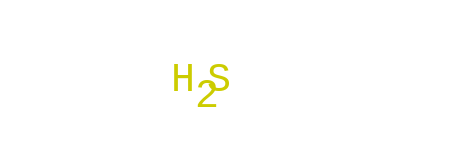

In [11]:
pattern = Chem.MolFromSmiles('S')
pattern

In [12]:
for mol in mol_list:
  print(mol.HasSubstructMatch(pattern))

False
False
False
True


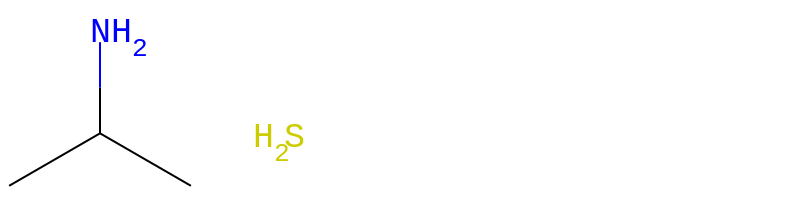

In [13]:
# Two patterns
pattern = [Chem.MolFromSmiles('CC(N)C'),Chem.MolFromSmiles('S')]
img = Draw.MolsToGridImage(pattern, molsPerRow=4)
img

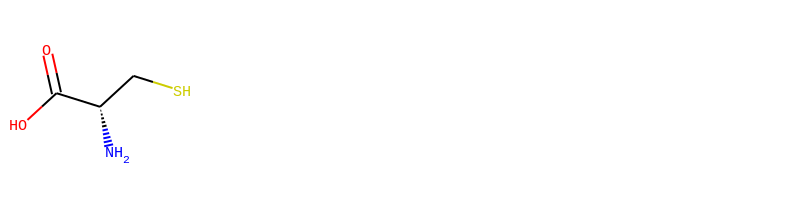

In [14]:
# Finding molecule that matches both patterns
pattern_yes_mol = []

for mol in mol_list:
  if mol.HasSubstructMatch(pattern[0]) and mol.HasSubstructMatch(pattern[1]):
    pattern_yes_mol.append(mol)

img = Draw.MolsToGridImage(pattern_yes_mol, molsPerRow=4)
img


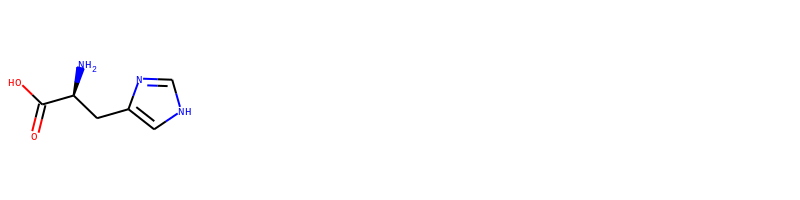

In [15]:
# patterns With SMARTS, Find if molecule has a ring

pattern = Chem.MolFromSmarts('[r5]')  # r5 is 5 membered ring

pattern_yes_mol = []
for mol in mol_list:
  if mol.HasSubstructMatch(pattern):
    pattern_yes_mol.append(mol)

img = Draw.MolsToGridImage(pattern_yes_mol, molsPerRow=4)
img


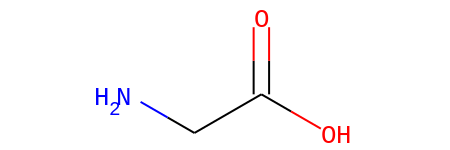

In [16]:
glycine = mol_list[0]
glycine

# Morgan Fingerprint matching

In [17]:
# Fingerprints for glycine
import numpy as np
bi = {}
fp = AllChem.GetMorganFingerprintAsBitVect(glycine,2,nBits=1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp,fp_arr)
print(fp_arr)
print(np.nonzero(fp_arr))
print(list(fp.GetOnBits()))
print(bi)

[0. 0. 0. ... 0. 0. 0.]
(array([ 27,  80, 147, 389, 650, 713, 807, 893, 966, 981]),)
[27, 80, 147, 389, 650, 713, 807, 893, 966, 981]
{27: ((0, 1),), 80: ((0, 0),), 147: ((4, 0),), 389: ((3, 1),), 650: ((2, 0),), 713: ((1, 1),), 807: ((1, 0), (3, 0)), 893: ((2, 1),), 966: ((0, 2),), 981: ((4, 1),)}


(<rdkit.Chem.rdchem.Mol object at 0x7fef1ac7bd00>, 27, {27: ((0, 1),), 80: ((0, 0),), 147: ((4, 0),), 389: ((3, 1),), 650: ((2, 0),), 713: ((1, 1),), 807: ((1, 0), (3, 0)), 893: ((2, 1),), 966: ((0, 2),), 981: ((4, 1),)})


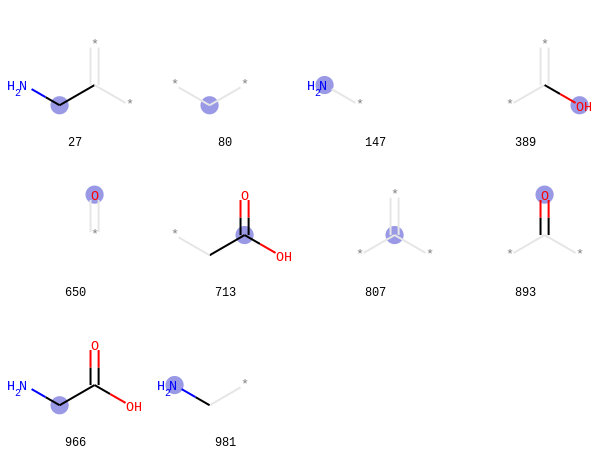

In [18]:
# visual representation of fingerprints for glycine
prints = [(glycine, x, bi) for x in fp.GetOnBits()]
print(prints[0])
Draw.DrawMorganBits(prints, molsPerRow=4, legends=[str(x) for x in fp.GetOnBits()])

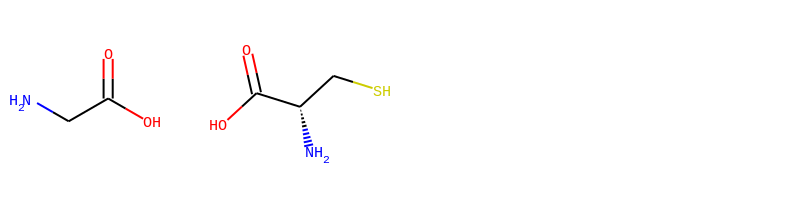

In [19]:
# Compare fingerprints with other molecules
cysteine = mol_list[3]
img = Draw.MolsToGridImage([glycine,cysteine], molsPerRow=4)
img

# Tanimoto Similarity between glycine and cysteine. This score tells how similar two molecules are. It is 30% between cysteine and glycine

In [21]:
# Similarity score between glycine and cysteine
fp_cys = AllChem.GetMorganFingerprintAsBitVect(cysteine,2,nBits=1024, bitInfo=bi)
print('cys',list(fp_cys.GetOnBits()))
print('gly',list(fp.GetOnBits()))

matches = set(fp_cys.GetOnBits()) & set(fp.GetOnBits())
unique_combined = set(list(fp_cys.GetOnBits()) + list(fp.GetOnBits())) 

print(matches)
print(unique_combined)
print('% similarity in fingerprints between glycine and cysteine is ',len(matches)/len(unique_combined)*100)

# can find similarity score also from tanimoto similarity
print('% similarity in fingerprints between glycine and cysteine is ',DataStructs.TanimotoSimilarity(fp, fp_cys)*100)

cys [1, 48, 80, 147, 229, 321, 389, 403, 435, 650, 786, 807, 820, 825, 893, 902]
gly [27, 80, 147, 389, 650, 713, 807, 893, 966, 981]
{389, 807, 650, 80, 147, 893}
{1, 321, 229, 389, 807, 902, 713, 650, 966, 48, 80, 786, 147, 403, 435, 820, 981, 825, 27, 893}
% similarity in fingerprints between glycine and cysteine is  30.0
% similarity in fingerprints between glycine and cysteine is  30.0
